In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('top_10_k_data.csv')
df.head()

,Publisher,Headline,Link,Date,Keywords,Excerpt,Facebook,FB_Overperforming,Twitter,TW_Overperforming,LinkedIn,hasVideo
0,worldnewsdailyreport.com,Woman arrested for training squirrels to attac...,https://worldnewsdailyreport.com/woman-arreste...,3/31/17 15:11,"Crime, Mental Illness, Wildlife, America, anim...",45-year old Janice Smith was arrested this mor...,1906460,13.996631,2780,1.298582,12,False
1,buzzfeed.com,Only People With Perfect Color Vision Can Read...,https://www.buzzfeed.com/lorynbrantz/only-peop...,3/6/17 11:14,Only People With Perfect Color Vision Can Read...,Do not adjust your monitor (unless youre a che...,1250909,164.830167,3630,3.178659,245,False
2,nationalreview.com,Trumps Executive Order on Refugees Separating...,http://www.nationalreview.com/article/444370/d...,1/28/17 17:32,"David French, Politics, Nation, World",To read the online commentary one would think...,1191089,0.000000,28090,0.000000,710,False
3,huffingtonpost.com,"Instead Of Trump's Wall, Let's Build A Border ...",http://www.huffingtonpost.com/entry/solar-pane...,12/19/16 11:39,"What's Working,Climate Change,Mexico,Sustainab...",It would create jobs for would-be immigrants a...,987710,0.000000,4260,0.000000,575,False
4,burrardstreetjournal.com,Female Legislators Unveil 'Male Ejaculation Bi...,http://www.burrardstreetjournal.com/female-leg...,1/24/17 2:42,NaN,WASHINGTON DCA group of female legislators ha...,965871,0.000000,5250,0.000000,38,False


In [3]:
df.shape

(10000, 12)

In [4]:
df.dtypes

Publisher             object
Headline              object
Link                  object
Date                  object
Keywords              object
Excerpt               object
Facebook               int64
FB_Overperforming    float64
Twitter                int64
TW_Overperforming    float64
LinkedIn               int64
hasVideo                bool
dtype: object

In [5]:

type(df['Headline'][0])

str

In [6]:

type(df['Publisher'][0])

str

In [7]:

type(df['Link'][0])

str

In [8]:
df['Date'] =pd.to_datetime(df['Date'])

In [9]:
df.dtypes

Publisher                    object
Headline                     object
Link                         object
Date                 datetime64[ns]
Keywords                     object
Excerpt                      object
Facebook                      int64
FB_Overperforming           float64
Twitter                       int64
TW_Overperforming           float64
LinkedIn                      int64
hasVideo                       bool
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Publisher            10000 non-null object
Headline             9999 non-null object
Link                 10000 non-null object
Date                 10000 non-null datetime64[ns]
Keywords             7528 non-null object
Excerpt              9995 non-null object
Facebook             10000 non-null int64
FB_Overperforming    10000 non-null float64
Twitter              10000 non-null int64
TW_Overperforming    10000 non-null float64
LinkedIn             10000 non-null int64
hasVideo             10000 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 869.2+ KB


In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9970    False
9971    False
9972    False
9973    False
9974    False
9975    False
9976    False
9977    False
9978    False
9979    False
9980    False
9981    False
9982    False
9983    False
9984    False
9985    False
9986    False
9987    False
9988    False
9989    False
9990    False
9991    False
9992    False
9993    False
9994    False
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [12]:
df['Publisher'].value_counts()

buzzfeed.com                    595
washingtonpost.com              591
huffingtonpost.com              583
nytimes.com                     422
npr.org                         404
cnn.com                         392
theguardian.com                 344
usatoday.com                    308
bbc.co.uk                       307
thehill.com                     307
abcnews.go.com                  272
dailykos.com                    245
indianexpress.com               239
indiatimes.com                  235
asianage.com                    214
dailycaller.com                 175
newyorker.com                   167
latimes.com                     149
news.nationalgeographic.com     147
cbc.ca                          145
time.com                        140
timesofindia.indiatimes.com     128
nypost.com                      122
hindustantimes.com              115
theatlantic.com                 105
money.cnn.com                    98
mirror.co.uk                     98
cbsnews.com                 

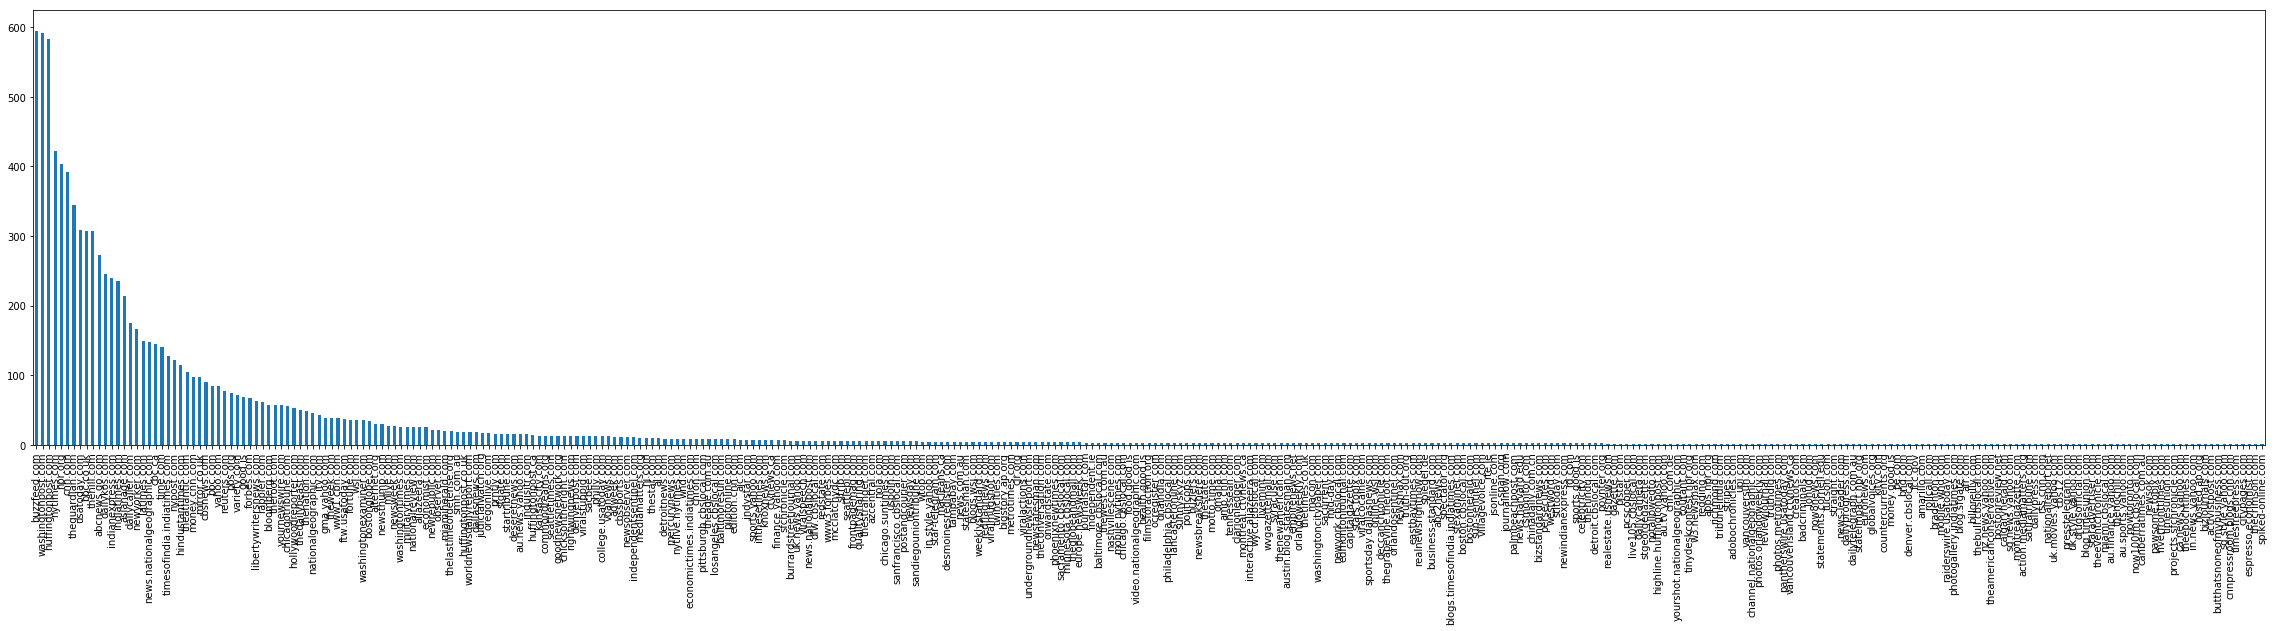

In [13]:
topPub =df['Publisher'].value_counts().plot(kind='bar',figsize=(40,8))


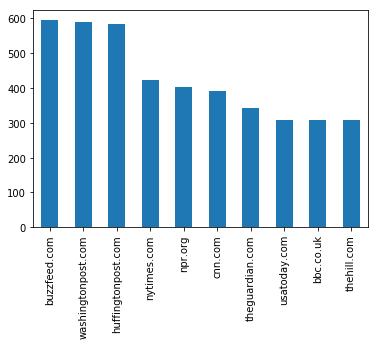

In [14]:
top10 = df["Publisher"].value_counts()
top10.sort_values(ascending=False)
top10 = top10[:10]
top10.plot(kind="bar")

donaldtrump                                                                    1535
politics                                                                        549
news                                                                            388
uspolitics                                                                      288
india                                                                           236
culture                                                                         213
environment                                                                     205
barackobama                                                                     199
trump                                                                           188
business                                                                        186
science                                                                         173
russia                                                                      

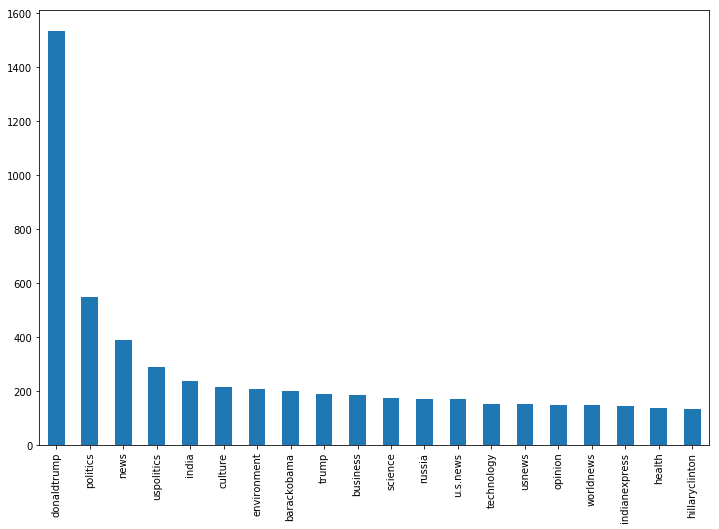

In [15]:
#get the top 20 keywords
keyword_count = pd.Series(np.concatenate([str(x).lower().strip().replace(' ', '').split(',')
                                          for x in df.Keywords])).value_counts()
keyword_count = keyword_count[keyword_count != 2472]
keyword_count = keyword_count[keyword_count != 910]
result = keyword_count.nlargest(20)
result.plot(kind='bar',figsize=(12,8))
print (keyword_count)

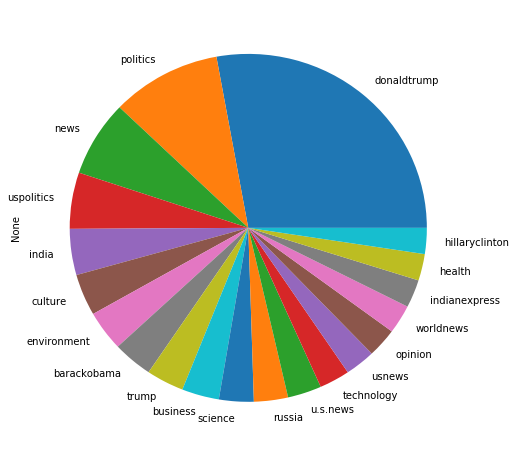

In [16]:
result.plot(kind='pie',figsize=(8,8))

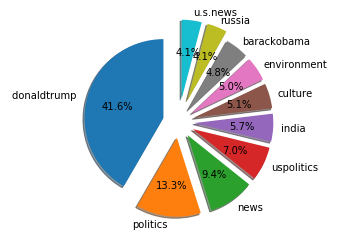

In [17]:
labels = keyword_count = 'donaldtrump ','politics','news','uspolitics','india','culture','environment','barackobama','russia','u.s.news'
sizes =[1723,549,388,288,236,213,205,199,170,169]
explode =(0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [18]:
from datetime import datetime as dt
#find the data happened between 2017-01-20 9am +- 12 hours
df_filtered_by_date = df[df['Date'].apply(lambda date: date >= dt.strptime('2017-01-10 00:00:00', '%Y-%m-%d %H:%M:%S') and date <= dt.strptime('2017-01-28 23:59:59', '%Y-%m-%d %H:%M:%S'))]
df_filtered_by_date_and_headline = df_filtered_by_date[df_filtered_by_date['Headline'].apply(lambda head: not set(['inauguration', 'trump']).isdisjoint(head.lower().split()))]
#find the top 10 publier during this time having the related topic
top_10_publier = df_filtered_by_date_and_headline["Publisher"].value_counts()
top_10_publier.sort_values(ascending=False)
top_10_publier = top_5_publier[:10]



NameError: name 'top_5_publier' is not defined

In [ ]:
#find the data during this time related this topic within these ten publishers
df_filtered_data = df_filtered_by_date_and_headline[df_filtered_by_date_and_headline['Publisher'].isin(['washingtonpost.com', 'nytimes.com', 'thehill.com', 'dailycaller.com', 'huffingtonpost.com', 'usatoday.com', 'npr.org', 'cnn.com', 'theguardian.com', 'dailykos.com'])]
df_filtered_data['Date_Round'] = df_filtered_data['Date'].dt.date
df_filtered_data.sort_values(['Publisher', 'Date_Round'], ascending = True)

In [ ]:
#get the count dictionary
from datetime import date
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.tools as tls
publishers = []
dates = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
counts = {}
N = 19
for index, row in df_filtered_data.iterrows():
    publisher = row['Publisher']
    date_index = row['Date_Round'] - date(2017, 1, 10)
    date_index = date_index.days
    if (publisher not in counts):
        publishers.append(publisher)
        tup = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        counts[publisher] = tup
    counts[publisher][date_index] += 1
print(counts)

In [ ]:
#draw the bar chart
mpl_fig = plt.figure(figsize=(10, 8))
ax = mpl_fig.add_subplot(111)
print(ind)
width = 0.5
previours = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
colors = [(1.0, 0.5, 0.62), (0.3, 0.2, 0.32), (1.0, 0.8, 0.32), 
          (0.7, 0.3, 0.22), (0.45, 0.7, 0.32), (0.9, 0.45, 0.22), 
          (0.06, 0.35, 0.42), (0.83, 0.23, 0.32), (0.38, 0.83, 0.88), (0.4, 0.7, 0.52)]
color_ind = 0
legend_one = [];
for key in counts:
    p = ax.bar(dates, counts[key], width, color=colors[color_ind], bottom=previours)
    previours = counts[key]
    color_ind += 1
    legend_one.append(p[0])
    
ax.set_ylabel('Count')
ax.set_xlabel('Date')
ax.set_title('Count by Publisher and Date')
ax.set_xticks(dates)
ax.set_yticks(np.arange(0, 40, 5))
ax.set_xticklabels(dates)
plotly_fig = tls.mpl_to_plotly(mpl_fig)
plotly_fig['layout']['showlegend'] = True
name_ind = 0
for key in counts:
    plotly_fig['data'][name_ind]['name'] = key
    name_ind += 1
plot_url = py.plot(plotly_fig, filename='stacked-bar-chart.html')
# plt.ylabel('Count')
# plt.xlabel('Date')
# plt.xticks(ind, dates)
# plt.legend(legend_one, publishers)
# plt.show()
